<a href="https://colab.research.google.com/github/ForestTiger-GH/COTRA/blob/main/COTRA%20v.6.4_Matrix%20Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Прогноз фьючерсных цен**

На основе регрессионного анализа: статистики Commitments of Traders и агрегированной матрицы будущих цен

# Подготовка данных

### Импорт библиотек

In [1]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 8.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=8a799f21292f1739c48a3e243057e8d5b850cf32280477ba277ddc027e473a7d
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import urllib.request
from zipfile import ZipFile
from io import BytesIO
from sklearn import linear_model 

import copy
import math

import sys

### Загрузка архивов

In [3]:
# Disaggregated Futures Only Reports:
Fdisagg_2006_2016 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_hist_2006_2016.zip').read())).open('F_Disagg06_16.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2010 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2010.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2011 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2011.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2012 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2012.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2013 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2013.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2014 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2014.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2015 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2015.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2016 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2016.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2017 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2017.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2018 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2018.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2019 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2019.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2020 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2020.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Fdisagg_2021 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_disagg_txt_2021.zip').read())).open('f_year.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})

# Traders in Financial Futures ; Futures Only Reports:
Ffin_2006_2016 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fin_fut_txt_2006_2016.zip').read())).open('F_TFF_2006_2016.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2010 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2010.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2011 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2011.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2012 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2012.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2013 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2013.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2014 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2014.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2015 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2015.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2016 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2016.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2017 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2017.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2018 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2018.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2019 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2019.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2020 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2020.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})
Ffin_2021 = pd.read_csv(ZipFile(BytesIO(urllib.request.urlopen('https://www.cftc.gov/files/dea/history/fut_fin_txt_2021.zip').read())).open('FinFutYY.txt'), sep=',', error_bad_lines=False, decimal='.', encoding='gbk', skiprows=0).rename(columns={'Report_Date_as_MM_DD_YYYY': 'Report_Date_as_YYYY-MM-DD'})

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,120,121,125,133,134,135,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,186) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (133,145,146,147,148,149,159,160) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (133,147,148,149,150,159,160) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (147,148,149,150,159,160) 

# Ввод параметров

Download_Stock_Prices (ticker, yf_ticker, number_future_weeks, target_price, skip_count_less)

*   ticker  - пользовательское название финансового инструмента
*   yf_ticker - биржевой код финансового инструмента
*   number_future_weeks - количество будущих недель для построения матрицы (ширина)
*   target_price - целевая цена, значения выше которой будут учитываться
*   skip_count_less - отсечение собранного количества целевых цен, если их меньше

cot_ticker - наименование финансового инструмента в статистике СОТ

In [4]:
# Загрузка словаря для корректировки ошибочных наименований (лишние пробелы и пр.)
corrections = pd.read_csv('https://raw.githubusercontent.com/ForestTiger-GH/COTRA/main/COTR_Corrections.txt', sep='\t', error_bad_lines=False, skiprows=0)
check = np.array(corrections).tolist()

# Файл со списком дат публикаций отчетов СОТ
dates = pd.read_csv('https://raw.githubusercontent.com/ForestTiger-GH/COTRA/main/COTR_Dates_20110104_20210323.txt', parse_dates=True)

# Список инструментов
instruments = pd.read_csv('https://raw.githubusercontent.com/ForestTiger-GH/COTRA/main/COTR_Instruments.csv', sep=';', error_bad_lines=False, skiprows=0).set_index(['Index'])

# Выбор инструмента по номеру из списка
set_index_of_instrument = 17

# Параметры построения матрицы цен
number_future_weeks = 26
target_price = 0.22
skip_count_less = 0

# Параметры для обзора крайних значений
last_weeks = 156

check_quality = 3.5

# Параметры для бэктеста

# DEF
desired_price = 0.05
trust_level = 3

null_for_pb = 0                     # протестировать 999

#CYCLE
desired_price_from = 0.002
desired_price_to = 0.030
desired_price_step = 0.002
desired_price_range = np.arange(desired_price_from, desired_price_to+desired_price_step, desired_price_step)
trust_level_range = np.arange(1, number_future_weeks+1, 1)

# FULL
target_price_from = 0.002
target_price_to = 0.030
target_price_step = 0.002
target_price_range = np.arange(target_price_from, target_price_to+target_price_step, target_price_step)

confirm_number_low = 50     # минимум 50 прошлых сделок по модели
confirm_payback_max = 26    # максимум %% недель - предельный срок окупаемости

ticker = instruments['Ticker'][set_index_of_instrument]
yf_ticker = instruments['Yf_ticker'][set_index_of_instrument]
cot_ticker = instruments['Cot_ticker'][set_index_of_instrument]

In [5]:
target_price_range

array([0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016, 0.018,
       0.02 , 0.022, 0.024, 0.026, 0.028, 0.03 ])

### Список инструментов

In [6]:
instruments

,Type,Ticker,Yf_ticker,Cot_ticker
Index,,,,
1,Commodities,Aluminum,ALI=F,ALUMINUM MW US TR PLATTS - COMMODITY EXCHANGE ...
2,Commodities,Coffee,KC=F,COFFEE C - ICE FUTURES U.S.
3,Commodities,Copper,HG=F,COPPER-GRADE #1 - COMMODITY EXCHANGE INC.
4,Commodities,Corn,ZC=F,CORN - CHICAGO BOARD OF TRADE
5,Commodities,CrudeOil_LightSweetWTI,CL=F,"CRUDE OIL, LIGHT SWEET-WTI - ICE FUTURES EUROPE"
6,Commodities,Gold,GC=F,GOLD - COMMODITY EXCHANGE INC.
7,Commodities,Palladium,PA=F,PALLADIUM - NEW YORK MERCANTILE EXCHANGE
8,Commodities,Platinum,PL=F,PLATINUM - NEW YORK MERCANTILE EXCHANGE
9,Commodities,Silver,SI=F,SILVER - COMMODITY EXCHANGE INC.


Не работают, из-за расхождения дат:

*   Aluminum (недавний)
*   Russian Ruble (были неторговые дни)
*   Index Russell 2000 (недавний)




# Commitments of Traders

### Обработка

Формируется товарная и финансовая модель для всех инструментов: 

обрезается, фильтруется, объединяется по списку дат

Disaggregated Futures Only Reports:

In [7]:
# Объединение в один df
Fdisagg_2010_now = []
Fdisagg_2010_now = Fdisagg_2010.append(Fdisagg_2011).append(Fdisagg_2012).append(Fdisagg_2013).append(Fdisagg_2014).append(Fdisagg_2015).append(Fdisagg_2016).append(Fdisagg_2017).append(Fdisagg_2018).append(Fdisagg_2019).append(Fdisagg_2020).append(Fdisagg_2021)

# Фильтр лишних колонок
Fdisagg_2010_now = Fdisagg_2010_now.iloc[:, 0:23].drop(Fdisagg_2010_now.columns[[1, 3, 4, 5, 6]], axis=1)

# Замена по списку
for i in range(len(check)):
    Fdisagg_2010_now['Market_and_Exchange_Names'].replace(to_replace = check[i][0], value = check[i][1], inplace = True)

# Переименование столбца дат
Fdisagg_2010_now.rename(columns={'Report_Date_as_YYYY-MM-DD' : 'Date'}, inplace=True)

# Объединение на основе списка дат
Fdisagg_2010_now = dates.merge(Fdisagg_2010_now, on='Date')

Traders in Financial Futures ; Futures Only Reports:

In [8]:
# Объединение в один df
Ffin_2010_now = []
Ffin_2010_now = Ffin_2010.append(Ffin_2011).append(Ffin_2012).append(Ffin_2013).append(Ffin_2014).append(Ffin_2015).append(Ffin_2016).append(Ffin_2017).append(Ffin_2018).append(Ffin_2019).append(Ffin_2020).append(Ffin_2021)

# Фильтр лишних колонок
Ffin_2010_now = Ffin_2010_now.iloc[:, 0:24].drop(Ffin_2010_now.columns[[1, 3, 4, 5, 6]], axis=1)

# Замена по списку
for i in range(len(check)):
    Ffin_2010_now['Market_and_Exchange_Names'].replace(to_replace = check[i][0], value = check[i][1], inplace = True)

# Переименование столбца дат
Ffin_2010_now.rename(columns={'Report_Date_as_YYYY-MM-DD' : 'Date'}, inplace=True)

# Объединение на основе списка дат
Ffin_2010_now = dates.merge(Ffin_2010_now, on='Date')

# Фьючерсные котировки

Класс для загрузки и обработки котировок фьючерсов под список дат отчетов СОТ

In [9]:
class Download_Stock_Prices(object):

# Матрицы рассчитываются на основе номеров столбцов расчетного датасета

    def __init__(self, ticker, yf_ticker, number_future_weeks, target_price, skip_count_less):
        self.ticker = ticker
        self.yf_ticker = yf_ticker
        self.number_future_weeks = number_future_weeks
        self.target_price = target_price
        self.skip_count_less = skip_count_less

        self.name = ticker
        self.descrip = str(number_future_weeks) + ' / ' + str(round(target_price*100,1)) + '%' + ' / ' + str(skip_count_less)

        # Файл с датировкой отчетов СОТ
        pdates = dates
        pdates['Date'] = pd.to_datetime(pdates['Date'])
        self.pdates = pdates['Date']

        # Загрузка с Yahoo и подготовка
        self.ticker = yf.Ticker(yf_ticker).history(period="max")
        self.ticker.index.name = 'Index'
        self.ticker['Date'] = self.ticker.index
        XXX = self.ticker.append(pdates)
        self.ticker = XXX.sort_values(by=['Date', 'Close'], ascending=True).ffill().drop_duplicates(subset=['Date']).merge(pdates['Date'], how='right')
        self.ticker.drop('Dividends', axis=1, inplace=True)
        self.ticker.drop('Stock Splits', axis=1, inplace=True)

        # Переменные названия столбцов
        column_week_prefix = "Week_"
        column_bilweek_prefix = "Bin_Long_Week_"
        column_bisweek_prefix = "Bin_Short_Week_"
        column_binweek_prefix = "Bin_Neut_Week_"    # Не включен в модель

        # matrix: CLOSE real
        for i in range(number_future_weeks):
            self.ticker[str(column_week_prefix + '%03d' % (i+1))] = ((self.ticker['Close'].shift(-i-1)) / self.ticker['Close'] - 1)

        # matrix: CLOSE long binary
        for i in range(number_future_weeks):
            self.ticker[str(column_bilweek_prefix + '%03d' % (i+1))] = ((self.ticker['Close'].shift(-i-1)) / self.ticker['Close'] - 1)

            self.ticker.loc[self.ticker[str(column_bilweek_prefix + '%03d' % (i+1))] >= target_price, str(column_bilweek_prefix + '%03d' % (i+1))] = 1
            self.ticker.loc[self.ticker[str(column_bilweek_prefix + '%03d' % (i+1))] < target_price, str(column_bilweek_prefix + '%03d' % (i+1))] = 0

        # matrix: CLOSE short binary
        for i in range(number_future_weeks):
            self.ticker[str(column_bisweek_prefix + '%03d' % (i+1))] = ((self.ticker['Close'].shift(-i-1)) / self.ticker['Close'] - 1)

            self.ticker.loc[self.ticker[str(column_bisweek_prefix + '%03d' % (i+1))]*(-1) <= target_price, str(column_bisweek_prefix + '%03d' % (i+1))] = 0
            self.ticker.loc[self.ticker[str(column_bisweek_prefix + '%03d' % (i+1))]*(-1) > target_price, str(column_bisweek_prefix + '%03d' % (i+1))] = 1


    # Формулы для вывода

    def price_tape(self):
        return self.ticker.iloc[:, :6]

    def close_price(self):
        return self.ticker['Close']

    def low_price(self):
        return self.ticker['Low']

    def high_price(self):
        return self.ticker['High']

    def fmx_real(self):
        matrix_real = self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, self.number_future_weeks*2 : self.number_future_weeks*3]
        return matrix_real

    def fmx_bilong(self):
        matrix_bilong = self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, : self.number_future_weeks]
        return matrix_bilong

    def fmx_bishort(self):
        matrix_bishort = self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, self.number_future_weeks : self.number_future_weeks*2]
        return matrix_bishort

    def fmx_sum_bilong(self):
        return self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, : self.number_future_weeks].sum(axis=1)

    def fmx_sum_bishort(self):
        return self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, self.number_future_weeks : self.number_future_weeks*2].sum(axis=1)

    def fmx_sum_binet(self):
        return self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, : self.number_future_weeks].sum(axis=1) - self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, self.number_future_weeks : self.number_future_weeks*2].sum(axis=1)

    def fmx_sum_bil_skip(self):
        sum_bilong = self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, : self.number_future_weeks].sum(axis=1)
        sum_bilong = sum_bilong.where(sum_bilong >= self.skip_count_less, 0)
        return pd.DataFrame(sum_bilong, columns=['Longs amount sum'])

    def fmx_sum_bis_skip(self):
        sum_bishort = self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, self.number_future_weeks : self.number_future_weeks*2].sum(axis=1)
        sum_bishort = sum_bishort.where(sum_bishort >= self.skip_count_less, 0)
        return pd.DataFrame(sum_bishort, columns=['Shorts amount sum'])

    def fmx_sum_bin_skip(self):
        sum_binet = self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, : self.number_future_weeks].sum(axis=1) - self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, self.number_future_weeks : self.number_future_weeks*2].sum(axis=1)
        sum_binet = sum_binet.where(abs(sum_binet) >= self.skip_count_less, 0)
        return pd.DataFrame(sum_binet, columns=['Nets amount sum'])

    def fmx_sum_bilbisbin_skip(self):
        sum_bilong = self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, : self.number_future_weeks].sum(axis=1)
        sum_bilong = sum_bilong.where(sum_bilong >= self.skip_count_less, 0)
        sum_bishort = self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, self.number_future_weeks : self.number_future_weeks*2].sum(axis=1)
        sum_bishort = sum_bishort.where(sum_bishort >= self.skip_count_less, 0)
        sum_binet = self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, : self.number_future_weeks].sum(axis=1) - self.ticker.iloc[:, 6:].sort_index(axis=1).iloc[:, self.number_future_weeks : self.number_future_weeks*2].sum(axis=1)
        sum_binet = sum_binet.where(abs(sum_binet) >= self.skip_count_less, 0)
        return pd.concat([pd.DataFrame(self.pdates, columns=['Date']), pd.DataFrame(sum_bilong, columns=['Longs amount sum']), pd.DataFrame(sum_bishort, columns=['Shorts amount sum']), pd.DataFrame(sum_binet, columns=['Nets amount sum'])], axis=1)

# Построение модели

## Обработка

In [10]:
# Ввод котировок инструмента
prices = Download_Stock_Prices(ticker, yf_ticker, number_future_weeks, target_price, skip_count_less)

# Ввод статистики СОТ по инструменту
Fdisagg_model = Fdisagg_2010_now.loc[Fdisagg_2010_now['Market_and_Exchange_Names'] == cot_ticker]
Ffin_model = Ffin_2010_now.loc[Ffin_2010_now['Market_and_Exchange_Names'] == cot_ticker]

# Выбор: товарная/финансовая модель
if instruments.loc[instruments['Ticker']==ticker]['Type'].any() == 'Commodities':
    use_model = Fdisagg_model
elif instruments.loc[instruments['Ticker']==ticker]['Type'].any() == 'Financial':
    use_model = Ffin_model

In [11]:
# Цены
price_close = prices.close_price()
price_low = prices.low_price()
price_high = prices.high_price()

# ВСЕ переменные
x = use_model.iloc[:, 2:]

# Реальные КУ
real_bil = prices.fmx_sum_bil_skip()
real_bis = prices.fmx_sum_bis_skip()
real_bin = prices.fmx_sum_bin_skip()

# Регрессионные модели
model1 = linear_model.LinearRegression()
model2 = linear_model.LinearRegression()
model3 = linear_model.LinearRegression()

model1.fit(x, real_bil)
model2.fit(x, real_bis)
model3.fit(x, real_bin)

# Прогнозные КУ
forecast_bil = model1.predict(x)
forecast_bis = model2.predict(x)
forecast_bin = model3.predict(x)

# R-square
r2_bil = model1.score(x, real_bil)
r2_bis = model2.score(x, real_bis)
r2_bin = model3.score(x, real_bin)


all_range = np.arange(0,len(real_bil))

In [12]:
# Очистка от массива. В дальнейшем прогнозные переменные с индексом 2
forecast_bil2 = []
forecast_bis2 = []
forecast_bin2 = []
for i in range(len(forecast_bil)): forecast_bil2.append(forecast_bil[i][0])
for i in range(len(forecast_bis)): forecast_bis2.append(-forecast_bis[i][0])
for i in range(len(forecast_bin)): forecast_bin2.append(forecast_bin[i][0])

In [13]:
# Динамика прогнозных коэффициентов
dyn_forecast_bil2 = []
dyn_forecast_bis2 = []
dyn_forecast_bin2 = []

for i in range(len(forecast_bil2)):
    if i == 0: continue
    dyn_forecast_bil2.append(forecast_bil2[i]-forecast_bil2[i-1])

for i in range(len(forecast_bis2)):
    if i == 0: continue
    dyn_forecast_bis2.append(forecast_bis2[i]-forecast_bis2[i-1])

for i in range(len(forecast_bin2)):
    if i == 0: continue
    dyn_forecast_bin2.append(forecast_bin2[i]-forecast_bin2[i-1])

In [14]:
pd.DataFrame(dyn_forecast_bil2, columns=['bil']).to_csv(index=False)

'bil\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\

## Обзор крайних значений

In [15]:
last_range = np.arange(0, last_weeks)
last_range_10 = np.arange(0, last_weeks, 10)

real_bil_last = np.array(real_bil[len(real_bil)-last_weeks:len(real_bil)])
real_bis_last = np.array(real_bis[len(real_bis)-last_weeks:len(real_bis)])
real_bin_last = np.array(real_bin[len(real_bin)-last_weeks:len(real_bin)])

forecast_bil2_last = forecast_bil2[len(forecast_bil2)-last_weeks:len(forecast_bil2)]
forecast_bis2_last = forecast_bis2[len(forecast_bis2)-last_weeks:len(forecast_bis2)]
forecast_bin2_last = forecast_bin2[len(forecast_bin2)-last_weeks:len(forecast_bin2)]

price_close_last = np.array(price_close[len(price_close)-last_weeks : len(price_close)])
price_low_last = np.array(price_low[len(price_low)-last_weeks : len(price_low)])
price_high_last = np.array(price_high[len(price_high)-last_weeks : len(price_high)])

## Визуализация

### Последние 5

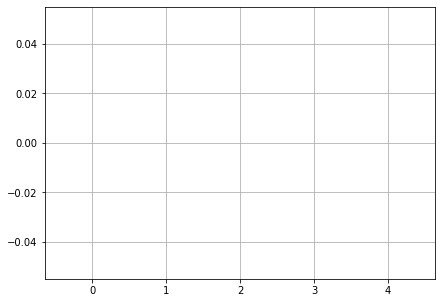

In [16]:
fig = plt.figure()
ax_1 = fig.add_subplot(1, 1, 1)
ax_1.grid(which='both')
ax_1.bar(np.arange(0, 5), forecast_bil2_last[len(forecast_bil2_last)-5 : len(forecast_bil2_last)], color='green')
ax_1.bar(np.arange(0, 5), forecast_bis2_last[len(forecast_bil2_last)-5 : len(forecast_bil2_last)], color='red')
fig.set_figwidth(7)
fig.set_figheight(5)
fig.show()

### Прогнозные NET

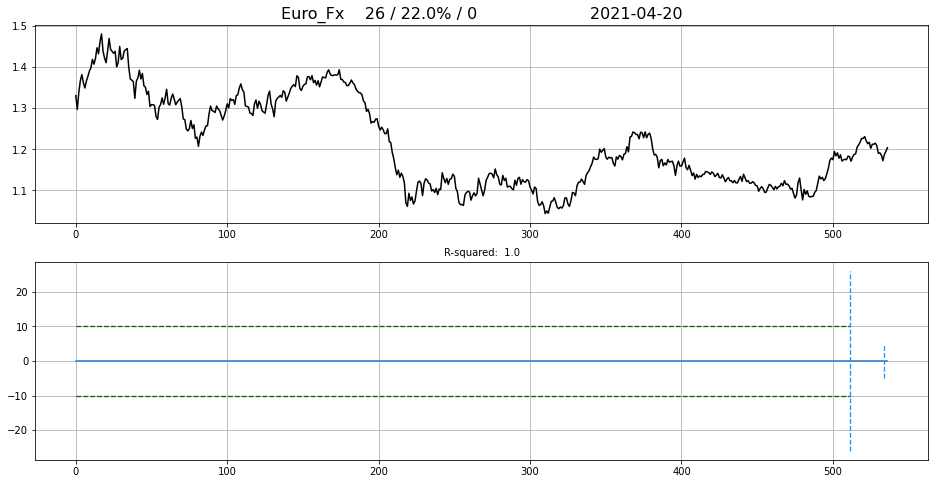

In [17]:
fig = plt.figure()
ax_1 = fig.add_subplot(2, 1, 1)
ax_1.grid()
ax_2 = fig.add_subplot(2, 1, 2)
ax_2.grid()

ax_1.set_title(prices.name+'    '+prices.descrip+'                      '+str(np.array(dates.iloc[-1:, 0:1].astype(object))[0][0])[:10], fontsize = 16)
ax_1.plot(price_close, color='black')

ax_2.set_title('R-squared:  '+str(round(r2_bin, 4)), fontsize = 10)
ax_2.plot(real_bin, color='darkorange')
ax_2.plot(forecast_bin, color='dodgerblue')

plt.hlines(10, 0, len(dates)-number_future_weeks, color = 'darkgreen', linewidth = 1.3, linestyle = '--')
plt.hlines(-10, 0, len(dates)-number_future_weeks, color = 'darkgreen', linewidth = 1.3, linestyle = '--')
# plt.hlines(5, 0, len(dates)-number_future_weeks, color = 'darkred', linewidth = 1.3, linestyle = '--')
# plt.hlines(-5, 0, len(dates)-number_future_weeks, color = 'darkred', linewidth = 1.3, linestyle = '--')

plt.vlines(len(dates)-number_future_weeks, -number_future_weeks, number_future_weeks, color = 'dodgerblue', linewidth = 1.3, linestyle = '--')
plt.vlines(len(dates)-3, -5, 5, color = 'dodgerblue', linewidth = 1.3, linestyle = '--')

fig.set_figwidth(16)
fig.set_figheight(8)
fig.show()

### Прогнозные LONG-SHORT

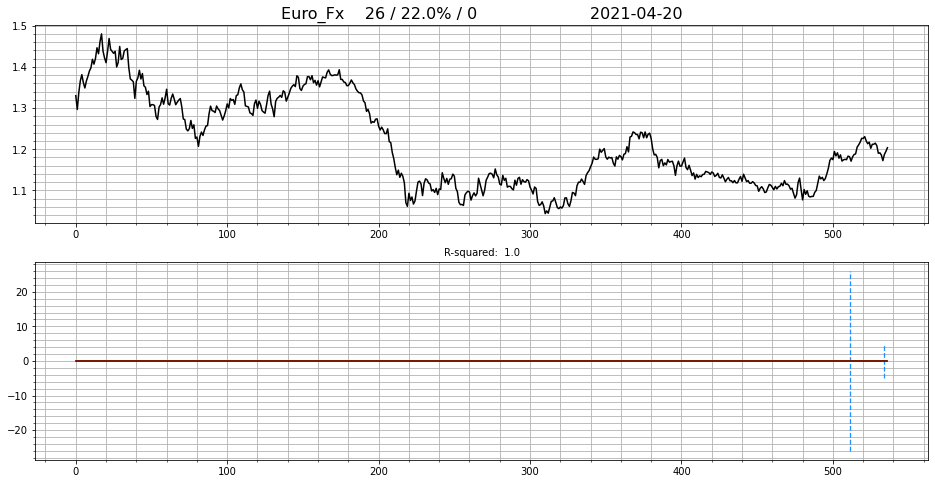

In [18]:
fig = plt.figure()
ax_1 = fig.add_subplot(2, 1, 1)
ax_1.grid(which='both')
ax_1.minorticks_on()
ax_2 = fig.add_subplot(2, 1, 2)
ax_2.grid(which='both')
ax_2.minorticks_on()

ax_1.set_title(prices.name+'    '+prices.descrip+'                      '+str(np.array(dates.iloc[-1:, 0:1].astype(object))[0][0])[:10], fontsize = 16)
ax_1.plot(price_close, color='black')

ax_2.set_title('R-squared:  '+str(round(r2_bin, 4)), fontsize = 10)
ax_2.plot(real_bin, color='darkorange')
ax_2.plot(forecast_bil, color='darkgreen')
ax_2.plot(forecast_bis, color='darkred')

# ax_2.plot(forecast_bin, color='dodgerblue')

plt.vlines(len(dates)-number_future_weeks, -number_future_weeks, number_future_weeks, color = 'dodgerblue', linewidth = 1.3, linestyle = '--')
plt.vlines(len(dates)-3, -5, 5, color = 'dodgerblue', linewidth = 1.3, linestyle = '--')

fig.set_figwidth(16)
fig.set_figheight(8)
fig.show()

### Прогнозные LONG-SHORT (крайние)

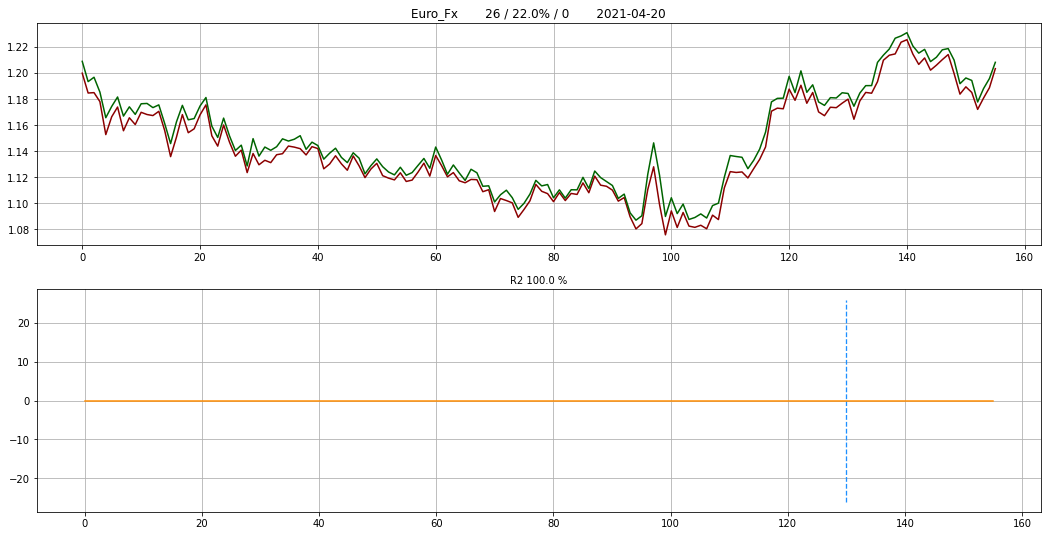

In [19]:
fig = plt.figure()

ax_1 = fig.add_subplot(2, 1, 1)
ax_1.grid(which='both')
ax_2 = fig.add_subplot(2, 1, 2)
ax_2.grid(which='both')

ax_1.plot(price_low_last, color='darkred')
ax_1.plot(price_high_last, color='darkgreen')
ax_2.bar(last_range, forecast_bil2_last, color='green')
ax_2.bar(last_range, forecast_bis2_last, color='red')
ax_2.plot(real_bin_last, color='darkorange')
ax_1.set_title(prices.name+'       '+prices.descrip+'       '+str(np.array(dates.iloc[-1:, 0:1].astype(object))[0][0])[:10])
ax_2.set_title('R2 '+str(round(r2_bin*100, 2))+' %', fontsize = 10)

# ax_2.set_title(prices.name+'       '+prices.descrip+'       '+'R2 '+str(round(r2_bin*100, 2))+' %')

plt.vlines(last_weeks-number_future_weeks, -number_future_weeks, number_future_weeks, color = 'dodgerblue', linewidth = 1.3, linestyle = '--')

fig.set_figwidth(18)
fig.set_figheight(9)
fig.show()

# Бэктест


In [20]:
def info(array):
    print('| amount:  {}'.format(str(count_nonzero(array))[:5]))
    print('| max:     {}'.format(str(np.max(array))[:5]))
    print('| mean:    {}'.format(str(np.mean(array))[:5]))
    print('| median:  {}'.format(str(np.median(array))[:5]))
    print('| min:     {}'.format(str(np.min(array))[:5]))
    print('| st dev:  {}'.format(str(np.std(array))[:5]))

def count_nonzero(array):
    qwerty = 0
    for i in range(len(array)):
        if array[i] > 0: qwerty +=1
        else: continue
    return qwerty

## Сетка ордеров (def)

In [21]:
# TakeProfit
price_TP_long = prices.close_price()*(1+desired_price)
price_TP_short = prices.close_price()*(1-desired_price)

In [22]:
# Расчет всех возможных сроков окупаемости

payback_long = np.where(np.arange(0, len(price_TP_long), 1) != 0, 0,0)
for i in range(len(price_TP_long)):
    for q in range(len(price_close)):
        if q <= i: continue
        if price_close[q] >= price_TP_long[i]:
            payback_long[i] = (q-i)
            break
        else: payback_long[i] = null_for_pb

payback_short = np.where(np.arange(0, len(price_TP_short), 1) != 0, 0,0)
for i in range(len(price_TP_short)):
    for q in range(len(price_close)):
        if q <= i: continue
        if price_close[q] <= price_TP_short[i]:
            payback_short[i] = (q-i)
            break
        else: payback_short[i] = null_for_pb

In [23]:
# Сетка ордеров, в зависимости от уровня доверия

bil_order_list = []
for i in range(len(forecast_bil2)):
    if forecast_bil2[i] >= trust_level:
        bil_order_list.append(forecast_bil2[i])
    else:
        bil_order_list.append(0)
bis_order_list = []
for i in range(len(forecast_bis2)):
    if forecast_bis2[i] <= -trust_level:
        bis_order_list.append(forecast_bis2[i])
    else:
        bis_order_list.append(0)

bin_order_list = []
for i in range(len(forecast_bin2)):
    if forecast_bin2[i] >= trust_level:
        bin_order_list.append(forecast_bin2[i])
    elif forecast_bin2[i] <= -trust_level:
        bin_order_list.append(forecast_bin2[i])
    else:
        bin_order_list.append(0)

In [24]:
# Объединение сетки ордеров со сроками окупаемости

bil_order_list2 = copy.copy(bil_order_list)
bis_order_list2 = copy.copy(bis_order_list)
bin_order_list2 = copy.copy(bin_order_list)

for i in range(len(bil_order_list2)):
    if bil_order_list2[i] != 0:
        bil_order_list2[i] = payback_long[i]
        
for i in range(len(bis_order_list2)):
    if bis_order_list2[i] != 0:
        bis_order_list2[i] = payback_short[i]

for i in range(len(bin_order_list2)):
    if bin_order_list2[i] > 0:
        bin_order_list2[i] = payback_long[i]
    elif bin_order_list2[i] < 0:
        bin_order_list2[i] = -payback_short[i]

## Aggregated Forecast

In [25]:
M1pre_long_target_price = []
M1pre_short_target_price = []

for p in range(len(target_price_range)):
    AF_target_price = target_price_range[p]

    # Ввод котировок инструмента
    AF_prices = Download_Stock_Prices(ticker, yf_ticker, number_future_weeks, AF_target_price, skip_count_less)

    # Ввод модели
    AF_use_model = use_model

    # Цены
    AF_price_close = AF_prices.close_price()
    AF_price_low = AF_prices.low_price()
    AF_price_high = AF_prices.high_price()

    # ВСЕ переменные
    AF_x = AF_use_model.iloc[:, 2:]

    # Реальные КУ
    AF_real_bil = AF_prices.fmx_sum_bil_skip()
    AF_real_bis = AF_prices.fmx_sum_bis_skip()


    # Регрессионные модели
    AF_model1 = linear_model.LinearRegression()
    AF_model2 = linear_model.LinearRegression()


    AF_model1.fit(AF_x, AF_real_bil)
    AF_model2.fit(AF_x, AF_real_bis)


    # Прогнозные КУ
    AF_forecast_bil = AF_model1.predict(AF_x)
    AF_forecast_bis = AF_model2.predict(AF_x)


    # Очистка от массива. В дальнейшем прогнозные переменные с индексом 2
    AF_forecast_bil2 = []
    AF_forecast_bis2 = []

    for i in range(len(AF_forecast_bil)): AF_forecast_bil2.append(AF_forecast_bil[i][0])
    for i in range(len(AF_forecast_bis)): AF_forecast_bis2.append(-AF_forecast_bis[i][0])


    # Округление до целого
    AF_forecast_bil4 = copy.copy(AF_forecast_bil2)
    AF_forecast_bis4 = copy.copy(AF_forecast_bis2)

    for i in range(len(AF_forecast_bil2)): AF_forecast_bil4[i] = round(AF_forecast_bil2[i],0)
    for i in range(len(AF_forecast_bis2)): AF_forecast_bis4[i] = round(AF_forecast_bis2[i],0)

    AF_check_bil = 1
    for i in range(len(AF_forecast_bil4)): 
        if AF_forecast_bil4[i] >= check_quality: 
            AF_check_bil = 0 
            break
    if AF_check_bil == 1: 
        print()
        print('long skip '+str(p))
        continue

    AF_check_bis = 1
    for i in range(len(AF_forecast_bis4)): 
        if AF_forecast_bis4[i] <= check_quality: 
            AF_check_bis = 0 
            break
    if AF_check_bil == 1: 
        print()
        print('short skip '+str(p))
        continue

    M1pre_long_target_price.append(np.array(AF_forecast_bil4).tolist())
    M1pre_short_target_price.append(np.array(AF_forecast_bis4).tolist())

# РАЗДЕЛИТЬ LONG И SHORT !!!!!

In [26]:
# Транспонирование результатов
M1_long_target_price = list(map(list, zip(*M1pre_long_target_price)))
M1_short_target_price = list(map(list, zip(*M1pre_short_target_price)))

In [27]:
pd.DataFrame(M1_long_target_price)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,12.0,12.0,12.0,11.0,11.0,10.0,10.0,10.0,9.0,9.0,8.0,8.0,7.0,7.0,6.0
1,10.0,10.0,9.0,9.0,9.0,9.0,8.0,8.0,8.0,8.0,7.0,7.0,7.0,6.0,6.0
2,14.0,14.0,13.0,12.0,12.0,11.0,11.0,10.0,10.0,9.0,9.0,8.0,8.0,7.0,7.0
3,12.0,12.0,11.0,11.0,10.0,10.0,9.0,9.0,9.0,8.0,8.0,7.0,7.0,6.0,6.0
4,12.0,12.0,11.0,11.0,10.0,10.0,9.0,9.0,8.0,8.0,7.0,7.0,7.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,13.0,13.0,12.0,12.0,12.0,11.0,11.0,11.0,10.0,10.0,10.0,9.0,9.0,8.0,8.0
533,12.0,11.0,11.0,10.0,10.0,10.0,9.0,9.0,9.0,9.0,8.0,8.0,7.0,7.0,7.0
534,11.0,11.0,11.0,10.0,10.0,10.0,10.0,9.0,9.0,9.0,8.0,8.0,8.0,7.0,7.0
535,12.0,11.0,11.0,11.0,10.0,10.0,10.0,10.0,9.0,9.0,9.0,8.0,8.0,7.0,7.0


In [28]:
# Среднее по строкам матрицы (среднее по разным target_price)
M1_long_mean = []
M1_short_mean = []
for i in range(len(M1_long_target_price)): M1_long_mean.append(np.mean(M1_long_target_price[i]))
for i in range(len(M1_short_target_price)): M1_short_mean.append(np.mean(M1_short_target_price[i]))

In [29]:
# Матрицы сроков окупаемости в зависимости от желаемых цен
M2_long_desired_price = []
M2_short_desired_price = []

for d in range(len(desired_price_range)):
    AF_desired_price = desired_price_range[d]

    # TakeProfit
    AF_price_TP_long = prices.close_price()*(1+AF_desired_price)
    AF_price_TP_short = prices.close_price()*(1-AF_desired_price)

    # Расчет всех возможных сроков окупаемости
    AF_payback_long = np.where(np.arange(0, len(AF_price_TP_long), 1) != 0, 0,0)
    for i in range(len(AF_price_TP_long)):
        for q in range(len(price_close)):
            if q <= i: continue
            if price_close[q] >= AF_price_TP_long[i]:
                AF_payback_long[i] = (q-i)
                break
            else: AF_payback_long[i] = null_for_pb
    M2_long_desired_price.append(np.array(AF_payback_long).tolist())

    AF_payback_short = np.where(np.arange(0, len(AF_price_TP_short), 1) != 0, 0,0)
    for i in range(len(AF_price_TP_short)):
        for q in range(len(price_close)):
            if q <= i: continue
            if price_close[q] <= AF_price_TP_short[i]:
                AF_payback_short[i] = (q-i)
                break
            else: AF_payback_short[i] = null_for_pb
    M2_short_desired_price.append(np.array(AF_payback_short).tolist())

In [30]:
lines = []
line_e = []

line_e.append([])
line_e.append([])
line_e.append([])
line_e.append([])
line_e.append([])
line_e.append([])
line_e.append([])
line_e.append([])
line_e.append([])
line_e.append([])
line_e.append([])
line_e.append([])

lines.append(line_e)

In [31]:
lines = []

for m in range(len(M1_long_target_price)):
    print()
    print('Progress:   {} / {}'.format(str(m),str(len(M1_long_target_price))))

    long_mean_2 = []
    long_meanAN_2 = []
    long_stdev_2 = []
    long_mint_2 = []
    long_mintAN_2 = []
    long_count_2 = []

    short_mean_2 = []
    short_meanAN_2 = []
    short_stdev_2 = []
    short_mint_2 = []
    short_mintAN_2 = []
    short_count_2 = []

    for t in range(len(M1_long_target_price[0])):
        BF_trust_level = M1_long_target_price[m][t]
        sys.stdout.write(':'+str(t+1))
        # ------------- Вначале повторный расчет forecast_bi*2 ------------- #

        BF_target_price = target_price_range[t]

        # Ввод котировок инструмента
        BF_prices = Download_Stock_Prices(ticker, yf_ticker, number_future_weeks, BF_target_price, skip_count_less)

        # Ввод модели
        BF_use_model = use_model

        # ВСЕ переменные
        BF_x = BF_use_model.iloc[:, 2:]

        # Реальные КУ
        BF_real_bil = BF_prices.fmx_sum_bil_skip()
        BF_real_bis = BF_prices.fmx_sum_bis_skip()

        # Регрессионные модели
        BF_model1 = linear_model.LinearRegression()
        BF_model2 = linear_model.LinearRegression()
        BF_model1.fit(BF_x, BF_real_bil)
        BF_model2.fit(BF_x, BF_real_bis)

        # Прогнозные КУ
        BF_forecast_bil = BF_model1.predict(BF_x)
        BF_forecast_bis = BF_model2.predict(BF_x)

        # Очистка от массива. В дальнейшем прогнозные переменные с индексом 2
        BF_forecast_bil2 = []
        BF_forecast_bis2 = []

        for i in range(len(BF_forecast_bil)): BF_forecast_bil2.append(BF_forecast_bil[i][0])
        for i in range(len(BF_forecast_bis)): BF_forecast_bis2.append(-BF_forecast_bis[i][0])

        # ------------- Далее построение матрицы trust_level/desired_price ------------- #

        long_mean_1 = []
        long_meanAN_1 = []
        long_stdev_1 = []
        long_mint_1 = []
        long_mintAN_1 = []
        long_count_1 = []

        short_mean_1 = []
        short_meanAN_1 = []
        short_stdev_1 = []
        short_mint_1 = []
        short_mintAN_1 = []
        short_count_1 = []

        for d in range(len(desired_price_range)):
            BF_desired_price = desired_price_range[d]

            # Расчет всех возможных сроков окупаемости
            BF_payback_long = M2_long_desired_price[d]
            BF_payback_short = M2_short_desired_price[d]

            # Сетка ордеров, в зависимости от уровня доверия
            BF_bil_order_list = []
            for i in range(len(BF_forecast_bil2)):
                if BF_forecast_bil2[i] >= BF_trust_level:
                    BF_bil_order_list.append(BF_forecast_bil2[i])
                else:
                    BF_bil_order_list.append(0)
            BF_bis_order_list = []
            for i in range(len(BF_forecast_bis2)):
                if BF_forecast_bis2[i] <= -BF_trust_level:
                    BF_bis_order_list.append(BF_forecast_bis2[i])
                else:
                    BF_bis_order_list.append(0)

            # Объединение сетки ордеров со сроками окупаемости
            BF_bil_order_list2 = copy.copy(BF_bil_order_list)
            BF_bis_order_list2 = copy.copy(BF_bis_order_list)

            for i in range(len(BF_bil_order_list2)):
                if BF_bil_order_list2[i] != 0:
                    BF_bil_order_list2[i] = BF_payback_long[i]
                    
            for i in range(len(BF_bis_order_list2)):
                if BF_bis_order_list2[i] != 0:
                    BF_bis_order_list2[i] = BF_payback_short[i]

            # Отслеживание необходимых показателей
            long_mean_1.append(np.mean(BF_bil_order_list2))
            long_meanAN_1.append( d / np.mean(BF_bil_order_list2) * 52 )
            long_stdev_1.append(np.std(BF_bil_order_list2))
            long_mint_1.append(np.mean(BF_bil_order_list2) + np.std(BF_bil_order_list2))
            long_mintAN_1.append( d / (np.mean(BF_bil_order_list2) + np.std(BF_bil_order_list2)) * 52 )
            long_count_1.append(count_nonzero(BF_bil_order_list2))

            short_mean_1.append(np.mean(BF_bis_order_list2))
            short_meanAN_1.append( d / np.mean(BF_bis_order_list2) * 52 )
            short_stdev_1.append(np.std(BF_bis_order_list2))
            short_mint_1.append(np.mean(BF_bis_order_list2) + np.std(BF_bis_order_list2))
            short_mintAN_1.append( d / (np.mean(BF_bis_order_list2) + np.std(BF_bis_order_list2)) * 52 )
            short_count_1.append(count_nonzero(BF_bis_order_list2))

        long_mean_2.append(np.array(long_mean_1).tolist())
        long_meanAN_2.append(np.array(long_meanAN_1).tolist())
        long_stdev_2.append(np.array(long_stdev_1).tolist())
        long_mint_2.append(np.array(long_mint_1).tolist())
        long_mintAN_2.append(np.array(long_mintAN_1).tolist())
        long_count_2.append(np.array(long_count_1).tolist())

        short_mean_2.append(np.array(short_mean_1).tolist())
        short_meanAN_2.append(np.array(short_meanAN_1).tolist())
        short_stdev_2.append(np.array(short_stdev_1).tolist())
        short_mint_2.append(np.array(short_mint_1).tolist())
        short_mintAN_2.append(np.array(short_mintAN_1).tolist())
        short_count_2.append(np.array(short_count_1).tolist())

    # Управляющая матрица
    M3_long_manage = []
    M3_short_manage = []
    for i in range(len(long_mean_2)): M3_long_manage.append([1] * len(long_mean_2[0]))
    for i in range(len(short_mean_2)): M3_short_manage.append([1] * len(short_mean_2[0]))
    M3_height = len(M3_long_manage)
    M3_weight = len(M3_long_manage[0])

    # Проверка условий по всем значениям всех матриц

    long_check_column = []
    long_check_column = [0]*M3_weight
    for x in range(M3_height):
        for y in range(M3_weight):
            # Условия далее
            if long_count_2[x][y] < confirm_number_low:
                M3_long_manage[x][y] = 0
            if M3_long_manage[x][y] == 1:
                if long_mean_2[x][y] > confirm_payback_max: 
                    M3_long_manage[x][y] = 0
            if M3_long_manage[x][y] == 1:
                if long_mint_2[x][y] > confirm_payback_max: 
                    long_check_column[y] = 1
    for x in range(M3_height):
        for y in range(M3_weight):
            if long_check_column[y] == 1:
                M3_long_manage[x][y] = 0
    M3_long_manage = np.array(M3_long_manage)
    M3_long_manage = np.where(M3_long_manage!=0, M3_long_manage, np.nan)


    short_check_column = []
    short_check_column = [0]*M3_weight
    for x in range(M3_height):
        for y in range(M3_weight):
            # Условия далее
            if short_count_2[x][y] < confirm_number_low:
                M3_short_manage[x][y] = 0
            if M3_short_manage[x][y] == 1:
                if short_mean_2[x][y] > confirm_payback_max: 
                    M3_short_manage[x][y] = 0
            if M3_short_manage[x][y] == 1:
                if short_mint_2[x][y] > confirm_payback_max: 
                    short_check_column[y] = 1
    for x in range(M3_height):
        for y in range(M3_weight):
            if short_check_column[y] == 1:
                M3_short_manage[x][y] = 0
    M3_short_manage = np.array(M3_short_manage)
    M3_short_manage = np.where(M3_short_manage!=0, M3_short_manage, np.nan)

    # Проверка, если все значения нулевые
    if np.all(np.isnan(M3_long_manage)):
       sys.stdout.write('   no Long')
    if np.all(np.isnan(M3_short_manage)):
       sys.stdout.write('   no Short')
    
    # ------------- Подготовка к оптимизации ------------- #

    # Расчет средних MEAN и meanAN
    print()
    long_mean_3 = copy.copy(long_mean_2)
    long_meanAN_3 = copy.copy(long_meanAN_2)
    for x in range(M3_height):
        for y in range(M3_weight):
            if M3_long_manage[x][y] == 1:
                long_mean_3[x][y] = long_mean_2[x][y]
            else:
                long_mean_3[x][y] = M3_long_manage[x][y]
    long_mean_3_mean = np.nanmean(long_mean_3, 0).tolist()
    long_mean_3_stdev = np.nanstd(long_mean_3, 0).tolist()
    for x in range(M3_height):
        for y in range(M3_weight):
            if M3_long_manage[x][y] == 1:
                long_meanAN_3[x][y] = long_meanAN_2[x][y]
            else:
                long_meanAN_3[x][y] = M3_long_manage[x][y]
    long_meanAN_3_mean = np.nanmean(long_meanAN_3, 0).tolist()

    print()
    short_mean_3 = copy.copy(short_mean_2)
    short_meanAN_3 = copy.copy(short_meanAN_2)
    for x in range(M3_height):
        for y in range(M3_weight):
            if M3_short_manage[x][y] == 1:
                short_mean_3[x][y] = short_mean_2[x][y]
            else:
                short_mean_3[x][y] = M3_short_manage[x][y]
    short_mean_3_mean = np.nanmean(short_mean_3, 0).tolist()
    short_mean_3_stdev = np.nanstd(short_mean_3, 0).tolist()
    for x in range(M3_height):
        for y in range(M3_weight):
            if M3_short_manage[x][y] == 1:
                short_meanAN_3[x][y] = short_meanAN_2[x][y]
            else:
                short_meanAN_3[x][y] = M3_short_manage[x][y]
    short_meanAN_3_mean = np.nanmean(short_meanAN_3, 0).tolist()

    # Расчет средних MINT и mintAN
    print()
    long_mint_3 = copy.copy(long_mint_2)
    long_mintAN_3 = copy.copy(long_mintAN_2)
    for x in range(M3_height):
        for y in range(M3_weight):
            if M3_long_manage[x][y] == 1:
                long_mint_3[x][y] = long_mint_2[x][y]
            else:
                long_mint_3[x][y] = M3_long_manage[x][y]
    long_mint_3_mean = np.nanmean(long_mint_3, 0).tolist()
    long_mint_3_stdev = np.nanstd(long_mint_3, 0).tolist()
    for x in range(M3_height):
        for y in range(M3_weight):
            if M3_long_manage[x][y] == 1:
                long_mintAN_3[x][y] = long_mintAN_2[x][y]
            else:
                long_mintAN_3[x][y] = M3_long_manage[x][y]
    long_mintAN_3_mean = np.nanmean(long_mintAN_3, 0).tolist()

    print()
    short_mint_3 = copy.copy(short_mint_2)
    short_mintAN_3 = copy.copy(short_mintAN_2)
    for x in range(M3_height):
        for y in range(M3_weight):
            if M3_short_manage[x][y] == 1:
                short_mint_3[x][y] = short_mint_2[x][y]
            else:
                short_mint_3[x][y] = M3_short_manage[x][y]
    short_mint_3_mean = np.nanmean(short_mint_3, 0).tolist()
    short_mint_3_stdev = np.nanstd(short_mint_3, 0).tolist()
    for x in range(M3_height):
        for y in range(M3_weight):
            if M3_short_manage[x][y] == 1:
                short_mintAN_3[x][y] = short_mintAN_2[x][y]
            else:
                short_mintAN_3[x][y] = M3_short_manage[x][y]
    short_mintAN_3_mean = np.nanmean(short_mintAN_3, 0).tolist()

    # ------------- Функция оптимизации ------------- #

    # Нормирование средних
    long_mint_4 = copy.copy(long_mint_3_mean)
    long_mintAN_4 = copy.copy(long_mintAN_3_mean)
    for i in range(len(long_mint_3_mean)): 
        if max(long_mint_3_mean) == min(long_mint_3_mean): continue
        long_mint_4[i] = ( (long_mint_3_mean[i] - min(long_mint_3_mean)) / (max(long_mint_3_mean)-min(long_mint_3_mean)) )
    for i in range(len(long_mintAN_3_mean)): 
        if max(long_mintAN_3_mean) == min(long_mintAN_3_mean): continue
        long_mintAN_4[i] = ( (long_mintAN_3_mean[i] - min(long_mintAN_3_mean)) / (max(long_mintAN_3_mean)-min(long_mintAN_3_mean)) )

    short_mint_4 = copy.copy(short_mint_3_mean)
    short_mintAN_4 = copy.copy(short_mintAN_3_mean)
    for i in range(len(short_mint_3_mean)): 
        if max(short_mint_3_mean) == min(short_mint_3_mean): continue
        short_mint_4[i] = ( (short_mint_3_mean[i] - min(short_mint_3_mean)) / (max(short_mint_3_mean)-min(short_mint_3_mean)) )
    for i in range(len(short_mintAN_3_mean)): 
        if max(short_mintAN_3_mean) == min(short_mintAN_3_mean): continue
        short_mintAN_4[i] = ( (short_mintAN_3_mean[i] - min(short_mintAN_3_mean)) / (max(short_mintAN_3_mean)-min(short_mintAN_3_mean)) )

    # Расчет разницы между нормированными средними и индексакция
    long_OPTIM = []
    for i in range(len(long_mint_4)): long_OPTIM.append(long_mintAN_4[i] - long_mint_4[i])

    long_OPTIM_2 = copy.copy(long_OPTIM)
    for i in range(len(long_OPTIM)):
        if long_OPTIM_2[i] == sorted(long_OPTIM, reverse=True)[0]:
            long_OPTIM_2[i] = 1
        elif long_OPTIM_2[i] == sorted(long_OPTIM, reverse=True)[1]:
            long_OPTIM_2[i] = 2
        elif long_OPTIM_2[i] == sorted(long_OPTIM, reverse=True)[2]:
            long_OPTIM_2[i] = 3
        elif long_OPTIM_2[i] == sorted(long_OPTIM, reverse=True)[3]:
            long_OPTIM_2[i] = 4
        elif long_OPTIM_2[i] == sorted(long_OPTIM, reverse=True)[4]:
            long_OPTIM_2[i] = 5
        else: long_OPTIM_2[i] = 0

    short_OPTIM = []
    for i in range(len(short_mint_4)): short_OPTIM.append(short_mintAN_4[i] - short_mint_4[i])

    short_OPTIM_2 = copy.copy(short_OPTIM)
    for i in range(len(short_OPTIM)):
        if short_OPTIM_2[i] == sorted(short_OPTIM, reverse=True)[0]:
            short_OPTIM_2[i] = 1
        elif short_OPTIM_2[i] == sorted(short_OPTIM, reverse=True)[1]:
            short_OPTIM_2[i] = 2
        elif short_OPTIM_2[i] == sorted(short_OPTIM, reverse=True)[2]:
            short_OPTIM_2[i] = 3
        elif short_OPTIM_2[i] == sorted(short_OPTIM, reverse=True)[3]:
            short_OPTIM_2[i] = 4
        elif short_OPTIM_2[i] == sorted(short_OPTIM, reverse=True)[4]:
            short_OPTIM_2[i] = 5
        else: short_OPTIM_2[i] = 0
    
    for g in range(len(long_OPTIM_2)):
        line_1 = []
        if long_OPTIM_2[g] == 0: 
            continue
        line_1.append(np.array(dates)[m])
        line_1.append(ticker)
        line_1.append(long_OPTIM_2[g])
        line_1.append('Long')
        line_1.append(M1_long_mean[m])
        line_1.append(desired_price_range[g])
        line_1.append(long_mean_3_mean[g])
        line_1.append(long_mean_3_stdev[g])
        line_1.append(long_mint_3_mean[g])
        line_1.append(long_mint_3_stdev[g])
        line_1.append(long_mintAN_3_mean[g])
        line_1.append(long_meanAN_3_mean[g])

        lines.append(line_1)

    for g in range(len(short_OPTIM_2)):
        line_1 = []
        if short_OPTIM_2[g] == 0: 
            continue
        line_1.append(np.array(dates)[m])
        line_1.append(ticker)
        line_1.append(short_OPTIM_2[g])
        line_1.append('Short')
        line_1.append(-M1_short_mean[m])
        line_1.append(desired_price_range[g])
        line_1.append(short_mean_3_mean[g])
        line_1.append(short_mean_3_stdev[g])
        line_1.append(short_mint_3_mean[g])
        line_1.append(short_mint_3_stdev[g])
        line_1.append(short_mintAN_3_mean[g])
        line_1.append(short_meanAN_3_mean[g])

        lines.append(line_1)


Progress:   0 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   1 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   2 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   3 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   4 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   5 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   6 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   7 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   8 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   9 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   10 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   11 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   12 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   13 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   14 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   15 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   16 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   17 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   18 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   19 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   20 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   21 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   22 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   23 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   24 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   25 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   26 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   27 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   28 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   29 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   30 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   31 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   32 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   33 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   34 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   35 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   36 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   37 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   38 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   39 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   40 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   41 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   42 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   43 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   44 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   45 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   46 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   47 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   48 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   49 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   50 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   51 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   52 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   53 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   54 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   55 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   56 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   57 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   58 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   59 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   60 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   61 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   62 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   63 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   64 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   65 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   66 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   67 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   68 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   69 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   70 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   71 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   72 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   73 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   74 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   75 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   76 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   77 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   78 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   79 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   80 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   81 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   82 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   83 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   84 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   85 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   86 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   87 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   88 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   89 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   90 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   91 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   92 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   93 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   94 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   95 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   96 / 537
:1:2:3:4:5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   111 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   112 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   113 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   114 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   115 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   116 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   117 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   118 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   119 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   120 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   121 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   122 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   123 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   124 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   125 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   126 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   127 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   128 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   129 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   130 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   131 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   132 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   133 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   134 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   135 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   136 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   137 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   138 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   139 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   140 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   141 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   142 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   143 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   144 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   145 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   146 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   147 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   148 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   149 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   150 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   151 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   152 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   153 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   154 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   155 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   156 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   157 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   158 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   159 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   160 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   161 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   162 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   163 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   164 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   165 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   166 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   167 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   168 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   169 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   170 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   171 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   172 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   173 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   174 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   175 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   176 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   177 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   178 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   179 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   180 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   181 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   182 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   183 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   184 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   185 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   186 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   187 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   188 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   189 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   190 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   191 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   192 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   193 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   194 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   195 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   196 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   197 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   198 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   199 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   200 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   201 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   202 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   203 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   204 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   205 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   206 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   207 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   208 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   209 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   210 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   211 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   212 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   213 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   214 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   215 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   216 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   217 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   218 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   219 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   220 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   221 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   222 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   223 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   224 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   225 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   226 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   227 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   228 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   229 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: Runt

:2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: RuntimeWarning: divide by zero encountered in double_scalars


:3:4:5:6:7:8:9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in double_scalars


:10:11:12:13:14:15   no Long   no Short




Progress:   230 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   231 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: Runt

:2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: RuntimeWarning: divide by zero encountered in dou

:3:4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: RuntimeWarning: divide by zero encountered in dou

:5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in double_scalars


:6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in double_scalars


:7:8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in double_scalars


:9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in double_scalars


:10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in double_scalars


:11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in double_scalars


:12:13:14:15   no Long   no Short




Progress:   232 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   233 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   234 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   235 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   236 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   237 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   238 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   239 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   240 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   241 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   242 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   243 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   244 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   245 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   246 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   247 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   248 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   249 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   250 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   251 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   252 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   253 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   254 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   255 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   256 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   257 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   258 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   259 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   260 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   261 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   262 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   263 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   264 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   265 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   266 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   267 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   268 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   269 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   270 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   271 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   272 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   273 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   274 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   275 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   276 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   277 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   278 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   279 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   280 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   281 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   282 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   283 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   284 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   285 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   286 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   287 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   288 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   289 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   290 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   291 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   292 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   293 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   294 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   295 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   296 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   297 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   298 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   299 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   300 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   301 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   302 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   303 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   304 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   305 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   306 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   307 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   308 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   309 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   310 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   311 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   312 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   313 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   314 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   315 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   316 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   317 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   318 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   319 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   320 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   321 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   322 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   323 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   324 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   325 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   326 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   327 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   328 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   329 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   330 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   331 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   332 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   333 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   334 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   335 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   336 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in double_scalars


:15   no Long   no Short




Progress:   337 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in double_scalars


:12:13:14

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in double_scalars


:15   no Long   no Short




Progress:   338 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   339 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   340 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   341 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   342 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   343 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   344 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   345 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   346 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   347 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   348 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   349 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   350 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   351 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   352 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   353 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   354 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   355 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   356 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   357 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   360 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   361 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   362 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   363 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   364 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   365 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   366 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   367 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   368 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   369 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   370 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   371 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   372 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   373 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   374 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   375 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   376 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   377 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   378 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   379 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   380 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   381 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   382 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   383 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   384 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   385 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   386 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   387 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   388 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   389 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   390 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   391 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   392 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   393 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   394 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   395 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   396 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   397 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   398 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   399 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   400 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   401 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   402 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   403 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   404 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   405 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   406 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   407 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   408 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   409 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   410 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   411 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   412 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   413 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   414 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   415 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   416 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   417 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   418 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   419 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   420 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   421 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   422 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   423 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   424 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   425 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   426 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   427 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   428 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   429 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   430 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   431 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   432 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   433 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   434 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   435 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   436 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   437 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   438 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   439 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   440 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   441 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   442 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   443 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   444 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   445 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   446 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   447 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   448 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   449 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   450 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   451 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   452 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   453 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   454 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   455 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   456 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   457 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   458 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   459 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   460 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   461 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   462 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   463 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   464 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   465 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long   no Short




Progress:   466 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   467 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   468 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   469 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   470 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   471 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   472 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   473 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   474 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   475 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   476 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   477 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   478 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   479 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   480 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   481 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   482 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   483 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   484 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   485 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   486 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   487 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   488 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   489 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   490 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   491 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   492 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   493 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   494 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   495 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   496 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   497 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   498 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   499 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15   no Long




Progress:   500 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   501 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   502 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   503 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   504 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   505 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   506 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   507 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   508 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   509 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   510 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   511 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   512 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   513 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   514 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   515 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   516 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   517 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   518 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   519 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   520 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   521 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   522 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   523 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   524 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   525 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   526 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   527 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   528 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   529 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   530 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   531 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   532 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   533 / 537
:1:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   534 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   535 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15




Progress:   536 / 537
:1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


:2:3:4:5:6:7:8:9:10:11:12:13:14:15





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:213: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:232: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:252: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: RuntimeWarning: Mean of empty slice


In [32]:
short_mint_3_mean

[8.006653652574302,
 9.43000257973443,
 10.579086380868421,
 11.390659896038558,
 12.710351828916677,
 13.334148755981566,
 14.067154668820653,
 15.231686281457767,
 15.972377500524008,
 16.722912379054115,
 17.447356591306015,
 nan,
 nan,
 nan,
 nan]

## Визуализация

### Все возможные сроки окупаемости (крайние значения)

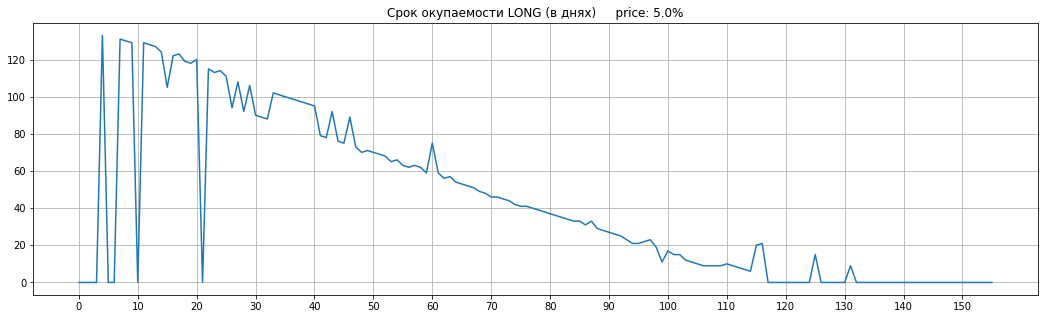

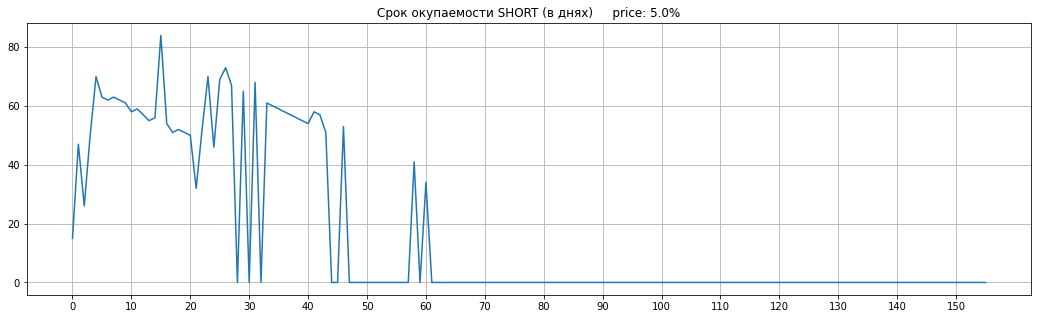

In [33]:
plt.figure(figsize=(18,5))
plt.title('Срок окупаемости LONG (в днях)     price: ' + str(desired_price*100)+'%')
plt.xticks(last_range_10)
plt.grid()

plt.plot(payback_long[len(payback_long)- last_weeks : len(payback_long)])

plt.show()
plt.figure(figsize=(18,5))
plt.title('Срок окупаемости SHORT (в днях)     price: ' + str(desired_price*100)+'%')
plt.xticks(last_range_10)
plt.grid()

plt.plot(payback_short[len(payback_short)- last_weeks : len(payback_short)])

plt.show()

### Сетка ордеров NET

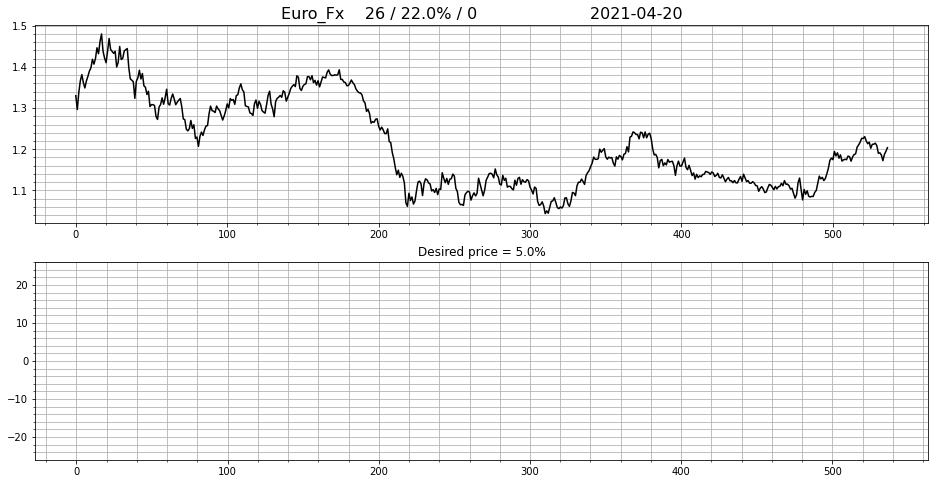

In [34]:
fig = plt.figure()    
ax_1 = fig.add_subplot(2, 1, 1)
ax_1.grid(which='both')
ax_1.minorticks_on()
ax_2 = fig.add_subplot(2, 1, 2)
ax_2.grid(which='both')
ax_2.minorticks_on()

ax_2.set_ylim(-26, 26)

ax_1.set_title(prices.name+'    '+prices.descrip+'                      '+str(np.array(dates.iloc[-1:, 0:1].astype(object))[0][0])[:10], fontsize = 16)
ax_1.plot(price_close, color='black')

ax_2.set_title('Desired price = {}%'.format(str(desired_price*100)))
ax_2.bar(all_range, bin_order_list2, color='darkblue')

fig.set_figwidth(16)
fig.set_figheight(8)
fig.show()

### Сетка ордеров LONG-SHORT

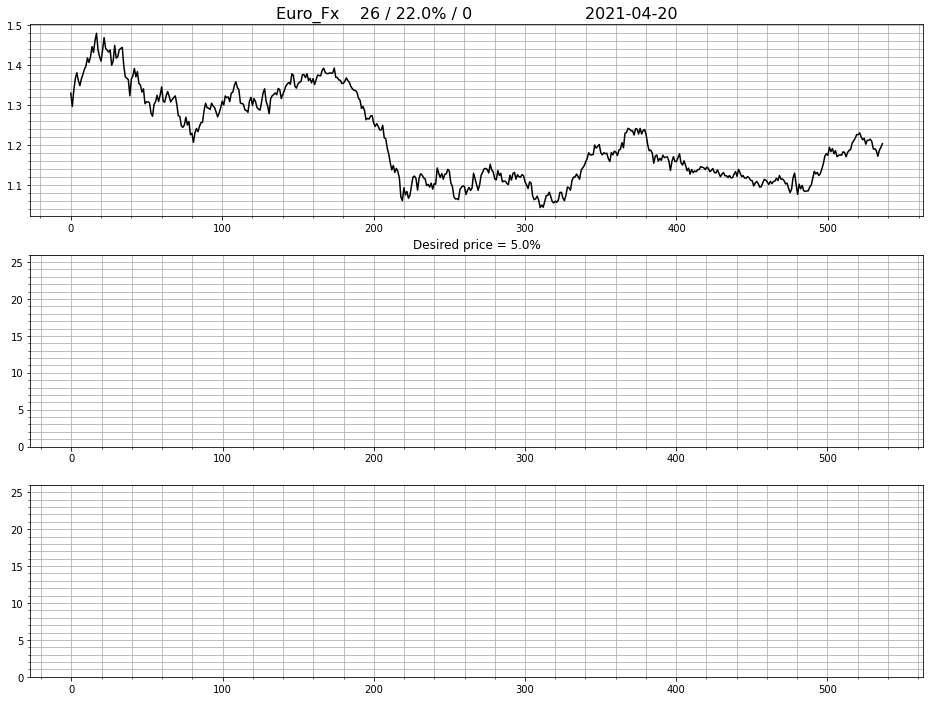

In [35]:
fig = plt.figure()
# axxx = np.arange(0,len(bil))
               
ax_1 = fig.add_subplot(3, 1, 1)
ax_1.grid(which='both')
ax_1.minorticks_on()
ax_2 = fig.add_subplot(3, 1, 2)
ax_2.grid(which='both')
ax_2.minorticks_on()
ax_3 = fig.add_subplot(3, 1, 3)
ax_3.grid(which='both')
ax_3.minorticks_on()

ax_2.set_ylim(0, 26)
ax_3.set_ylim(0, 26)

ax_1.set_title(prices.name+'    '+prices.descrip+'                      '+str(np.array(dates.iloc[-1:, 0:1].astype(object))[0][0])[:10], fontsize = 16)
ax_1.plot(price_close, color='black')

ax_2.set_title('Desired price = {}%'.format(str(desired_price*100)))
ax_2.bar(all_range, bil_order_list2, color='darkgreen')
ax_3.bar(all_range, bis_order_list2, color='darkred')

fig.set_figwidth(16)
fig.set_figheight(12)
fig.show()

In [36]:
bil_order_list2 = pd.DataFrame(bil_order_list2, columns=['bil_order_list']).replace(0, np.NaN)
bis_order_list2 = pd.DataFrame(bis_order_list2, columns=['bis_order_list']).replace(0, np.NaN)

In [37]:
print('Longs')
print(info(bil_order_list2['bil_order_list']), end='\n\n')
print('Shorts')
print(info(bis_order_list2['bis_order_list']))

Longs
| amount:  0
| max:     nan
| mean:    nan
| median:  nan
| min:     nan
| st dev:  nan
None

Shorts
| amount:  0
| max:     nan
| mean:    nan
| median:  nan
| min:     nan
| st dev:  nan
None


### Распределение ордеров в зависимости от сроков окупаемости

In [38]:
# plt.figure(figsize=(15,5))
# plt.hist(bil_order_list2['bil_order_list'])
# plt.show()
# plt.figure(figsize=(15,5))
# plt.hist(bis_order_list2['bis_order_list'])
# plt.show()

# Выгрузка статистики

In [39]:
lines_columns = ['Date', 'Ticker', 'Quality', 'Vector', 'KY', 'Desired Price', 'Mean T', 'Mean T Conf', 'Mint T', 'Mint T Conf', 'Annual % Mean', 'Annual % Mint']

In [40]:
len(lines)

3877

In [41]:
pd.DataFrame(lines, columns=lines_columns)

,Date,Ticker,Quality,Vector,KY,Desired Price,Mean T,Mean T Conf,Mint T,Mint T Conf,Annual % Mean,Annual % Mint
0,[2011-01-04T00:00:00.000000000],Euro_Fx,5,Long,9.466667,0.008,1.835382,0.307586,6.628447,1.037563,24.051245,87.175583
1,[2011-01-04T00:00:00.000000000],Euro_Fx,1,Long,9.466667,0.010,1.997145,0.339323,7.086729,1.147751,30.051636,106.932531
2,[2011-01-04T00:00:00.000000000],Euro_Fx,4,Long,9.466667,0.012,2.236251,0.352883,8.693804,1.018335,30.281061,118.912457
3,[2011-01-04T00:00:00.000000000],Euro_Fx,2,Long,9.466667,0.014,2.483054,0.352481,9.382471,0.969281,33.582390,128.018073
4,[2011-01-04T00:00:00.000000000],Euro_Fx,3,Long,9.466667,0.018,2.909249,0.397997,11.035646,0.985785,37.974684,145.483584
...,...,...,...,...,...,...,...,...,...,...,...,...
3872,[2021-04-20T00:00:00.000000000],Euro_Fx,4,Short,-4.133333,0.006,2.791682,0.807698,10.579086,1.775883,10.102837,40.201776
3873,[2021-04-20T00:00:00.000000000],Euro_Fx,1,Short,-4.133333,0.008,3.132092,0.988965,11.390660,2.175576,14.164553,54.388474
3874,[2021-04-20T00:00:00.000000000],Euro_Fx,5,Short,-4.133333,0.010,3.575916,1.095682,12.710352,2.113593,16.795321,63.263738
3875,[2021-04-20T00:00:00.000000000],Euro_Fx,3,Short,-4.133333,0.012,3.947610,1.257687,13.334149,2.345385,20.069385,72.109422


In [42]:
pd.DataFrame(lines, columns=lines_columns).to_csv()

",Date,Ticker,Quality,Vector,KY,Desired Price,Mean T,Mean T Conf,Mint T,Mint T Conf,Annual % Mean,Annual % Mint\n0,['2011-01-04T00:00:00.000000000'],Euro_Fx,5,Long,9.466666666666667,0.008,1.835381750465549,0.30758615844666326,6.628447428951322,1.0375630173863948,24.051245411276973,87.17558326206519\n1,['2011-01-04T00:00:00.000000000'],Euro_Fx,1,Long,9.466666666666667,0.01,1.9971446306641838,0.3393234115497116,7.086728507669869,1.147750852292616,30.05163573344213,106.93253134569503\n2,['2011-01-04T00:00:00.000000000'],Euro_Fx,4,Long,9.466666666666667,0.012,2.2362507759155803,0.35288312485133244,8.693804287333997,1.0183354918593486,30.28106113324673,118.91245700766642\n3,['2011-01-04T00:00:00.000000000'],Euro_Fx,2,Long,9.466666666666667,0.014,2.483054003724395,0.3524806001214975,9.382471278432662,0.969280793506114,33.582390059082776,128.01807277212748\n4,['2011-01-04T00:00:00.000000000'],Euro_Fx,3,Long,9.466666666666667,0.018000000000000002,2.909248913718187,0.3979967724526556,11.0356460

In [43]:
pd.concat([pd.DataFrame(dates), pd.DataFrame(price_close)], axis=1).to_csv(index=False)

'Date,Close\n2011-01-04,1.3301000595092773\n2011-01-11,1.2965999841690063\n2011-01-18,1.3380000591278076\n2011-01-25,1.3662999868392944\n2011-02-01,1.3812999725341797\n2011-02-08,1.3621000051498413\n2011-02-15,1.3488999605178833\n2011-02-22,1.3658000230789185\n2011-03-01,1.3769999742507935\n2011-03-08,1.3901000022888184\n2011-03-15,1.3977999687194824\n2011-03-22,1.4184999465942383\n2011-03-29,1.4068000316619873\n2011-04-05,1.4205000400543213\n2011-04-12,1.4465999603271484\n2011-04-19,1.4321000576019287\n2011-04-26,1.461400032043457\n2011-05-03,1.480299949645996\n2011-05-10,1.4383000135421753\n2011-05-17,1.4218000173568726\n2011-05-24,1.4103000164031982\n2011-05-31,1.4378999471664429\n2011-06-07,1.4692000150680542\n2011-06-14,1.4426000118255615\n2011-06-21,1.437999963760376\n2011-06-28,1.4330999851226807\n2011-07-05,1.438099980354309\n2011-07-12,1.399999976158142\n2011-07-19,1.4107999801635742\n2011-07-26,1.4498000144958496\n2011-08-02,1.4179999828338623\n2011-08-09,1.4208999872207642\n

In [45]:
pd.DataFrame(long_count_2, columns=desired_price_range)

,0.002,0.004,0.006,0.008,0.010,0.012,0.014,0.016,0.018,0.020,0.022,0.024,0.026,0.028,0.030
0,267,261,259,258,254,247,243,242,239,238,236,234,233,229,227
1,244,238,236,235,233,226,222,221,219,218,217,216,215,212,211
2,226,220,218,217,215,209,207,206,204,203,202,201,200,198,197
3,238,232,230,229,227,220,217,216,214,213,212,211,210,207,206
4,221,215,213,212,210,204,202,201,200,199,198,197,196,193,192
5,200,194,192,191,189,184,183,182,181,180,179,178,178,177,176
6,175,169,168,168,166,163,162,161,161,160,160,160,160,159,159
7,192,186,185,184,182,177,175,174,173,172,172,171,171,169,169
8,178,172,171,170,168,165,163,162,162,161,161,161,161,160,160
9,151,145,145,145,144,141,141,140,140,140,140,140,140,139,139


In [46]:
pd.DataFrame(long_mean_2, columns=desired_price_range)

,0.002,0.004,0.006,0.008,0.010,0.012,0.014,0.016,0.018,0.020,0.022,0.024,0.026,0.028,0.030
0,2.750466,2.921788,3.094972,3.532588,3.949721,4.312849,4.571695,5.009311,5.361266,6.104283,6.973929,7.497207,7.893855,NaN,NaN
1,1.878957,2.037244,2.176909,2.594041,2.836127,3.165736,3.385475,3.763501,3.992551,4.491620,5.255121,5.789572,6.057728,NaN,NaN
2,1.705773,1.854749,1.988827,2.400372,2.590317,2.867784,3.119181,3.424581,3.620112,4.104283,4.713222,5.191806,5.435754,NaN,NaN
3,1.877095,2.027933,2.165736,2.579143,2.886406,3.175047,3.430168,3.737430,3.936685,4.424581,5.154562,5.642458,5.929236,NaN,NaN
4,1.657356,1.787709,1.921788,2.260708,2.446927,2.687151,2.962756,3.266294,3.482309,3.968343,4.577281,4.916201,5.130354,NaN,NaN
5,1.344507,1.471136,1.597765,1.927374,2.102421,2.342644,2.612663,2.851024,3.037244,3.454376,4.059590,4.391061,4.687151,NaN,NaN
6,1.221601,1.322160,1.439479,1.757914,1.923650,2.163873,2.394786,2.623836,2.800745,3.035382,3.629423,3.880819,4.167598,NaN,NaN
7,1.297952,1.415270,1.538175,1.862197,2.029795,2.271881,2.528864,2.759777,2.947858,3.184358,3.791434,4.055866,4.344507,NaN,NaN
8,1.240223,1.337058,1.458101,1.778399,1.944134,2.186220,2.437616,2.664804,2.849162,3.081937,3.687151,3.936685,4.210428,NaN,NaN
9,1.016760,1.093110,1.217877,1.445065,1.551210,1.778399,2.001862,2.206704,2.374302,2.538175,2.986965,3.188082,3.398510,NaN,NaN


In [47]:
res = pd.concat([pd.DataFrame(long_count_2, columns=desired_price_range), pd.DataFrame(long_mean_2, columns=desired_price_range), pd.DataFrame(long_mint_2, columns=desired_price_range)], axis=1)
res.to_csv(index=False)

'0.002,0.004,0.006,0.008,0.01,0.012,0.014,0.016,0.018000000000000002,0.020000000000000004,0.022,0.024,0.026000000000000002,0.028000000000000004,0.03,0.002,0.004,0.006,0.008,0.01,0.012,0.014,0.016,0.018000000000000002,0.020000000000000004,0.022,0.024,0.026000000000000002,0.028000000000000004,0.03,0.002,0.004,0.006,0.008,0.01,0.012,0.014,0.016,0.018000000000000002,0.020000000000000004,0.022,0.024,0.026000000000000002,0.028000000000000004,0.03\n267,261,259,258,254,247,243,242,239,238,236,234,233,229,227,2.750465549348231,2.921787709497207,3.094972067039106,3.532588454376164,3.9497206703910615,4.312849162011173,4.571694599627561,5.009310986964619,5.361266294227188,6.104283054003725,6.973929236499069,7.4972067039106145,7.893854748603352,,,11.888203451761932,12.201901515929386,12.496243468099134,13.264725287614395,14.503091499769923,15.661352647531217,16.369769889893142,17.60272014707152,18.414082249243584,20.20515404345097,23.004837174863816,24.18908219114379,24.994332799609502,,\n244,238,2

In [48]:
res = pd.concat([pd.DataFrame(short_count_2, columns=desired_price_range), pd.DataFrame(short_mean_2, columns=desired_price_range), pd.DataFrame(short_mint_2, columns=desired_price_range)], axis=1)
res.to_csv(index=False)

'0.002,0.004,0.006,0.008,0.01,0.012,0.014,0.016,0.018000000000000002,0.020000000000000004,0.022,0.024,0.026000000000000002,0.028000000000000004,0.03,0.002,0.004,0.006,0.008,0.01,0.012,0.014,0.016,0.018000000000000002,0.020000000000000004,0.022,0.024,0.026000000000000002,0.028000000000000004,0.03,0.002,0.004,0.006,0.008,0.01,0.012,0.014,0.016,0.018000000000000002,0.020000000000000004,0.022,0.024,0.026000000000000002,0.028000000000000004,0.03\n335,332,330,330,330,330,330,329,325,323,322,320,315,312,308,3.111731843575419,3.554934823091248,4.294227188081937,5.1582867783985105,5.709497206703911,6.422718808193668,7.11731843575419,7.837988826815643,8.355679702048418,9.100558659217876,10.035381750465548,,,,,10.418688311859302,11.767047127284552,13.62365362206593,15.999063103427257,16.845751818839226,18.083108939250796,19.289546873347692,20.912400202731988,22.41044523625181,23.849391257176645,25.72963977996004,,,,\n310,308,307,307,307,307,307,306,304,302,301,300,296,293,289,2.9273743016759775,3